## Домашняя работа 6

***В сумме за домашнюю работу вы можете получить 13 баллов (Задания 8-9 по 2 балла).*** <br> 
***Итоговая оценка будет равна доле полученных баллов от общей суммы x10.*** 
<p>
<font size='3' color="B3000C">Ноутбук (файл в расширением .ipynb) выложите на свой git и пришлите ссылку на почту python.in.miigaik@gmail.com.<br> В теме письма укажите номер домашней работы и номер группы: HW... , Group... .</font>
</p>

## Задание
Сегодня мы будем анализировать статистику ДТП на основе открытых данных взятых с сайта https://xn--80abhddbmm5bieahtk5n.xn--p1ai/opendata.
1. Загрузите данные из файла [hw_dataset.csv](https://yadi.sk/d/XJW4IKU8Qrg7qQ) (лежит на Я.Диске, поэтому сначала его придется скачать).
2. Посмотрите, в каких столбцах есть пропущенные значения.
3. Удалите те строки, в которых на указана причина ДТП (crash_reason).
4. Постройте барплот количества происшествий по областям (по оси x - области, по оси y- количество ДТП) за все года.
5. Посмотрите, сколько ДТП происходило в какой год, упорядочьте года в порядке возрастания ДТП. 
6. Сделайте статистику по месяцам - вычислите среднее количество происшествий за каждый месяц по годам. (Будьте внимательны, 2018 год еще не закончился), найдите "самый опасный" и "самый безопасный" месяцы. (То есть требуется написать код, который выдаст название месяца по заданной статистике).
7. Теперь посмотрите на причины дтп: возьмите топ 5 самых опасных областей. И для каждой найдите топ 10 самых распространенных пиричин ДТП. Нарисуйте piechart'ы причин для каждой области. (Пожалуйста, напишите в заголовке пайчарта название области). Посмотрите, отличаются ли причины для каждой области?
8. Найдите самое "опасное" время. 
Для этого вам придется написать функцию, которая будет переводить строку формата "HH:MM:SS" в число в секундах и обратно. Реализуйте эти действия в виде одной функции, на вход которой будет подаваться либо число, либо строка, и которая будет вовзаращать строку или число соответственно. (понадобится функция type). Если не получится реализовать в виде одной функции, напишите 2 отдельные.
9. Нарисуйте гистрограмму распределения числа происшествий в зависимости от времени суток, выраженных в секундах. (В гистрограмме должен присутствовать столбик для каждого часа. Всего 24 часа). Конвертируйте секунды в часы, чтобы подписать оси (см. подсказки).
10. Найдите самый "опасный" час. (по данным гистограммы, но программно)<br>
11. Напишите самый опасный год, месяц, время суток и самую рапространенную причину ДТП. (Если вы нашли не все, напишите то, что нашли).

**Подсказки**
1. pd.read_csv('hw_dataset.csv', sep=';', engine='python')
2. np.unique(x, return_counts=True) - находит уникальные значения x, и подсчитывает какое значение сколько раз встретилось.
3. plt.title('title', fontsize=18)
4. plt.xticks([0,1,2], ['aaa', 'bbb', 'ccc'], rotation=45) 
5. plt.figure(figsize=(13, 6)) - устанавливает размер графика в относительных единицах.

In [1]:
# P. 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('hw_dataset.csv', sep=';', engine='python')
#df.head(10)

In [2]:
# P. 2
df.isna().sum()

reg_code                    0
reg_name                    0
road_code              242475
road_name              182977
road_type               59094
oktmo                  166945
address                    16
crash_type_name           336
crash_date                  0
crash_time                  0
crash_reason           128505
fatalities_amount           0
victims_amount              0
vehicles_amount             0
participants_amount         0
latitude                    0
longitude                   0
dtype: int64

In [3]:
# P. 3
df = df.dropna(subset=['crash_reason'])
        
#df.head(10)

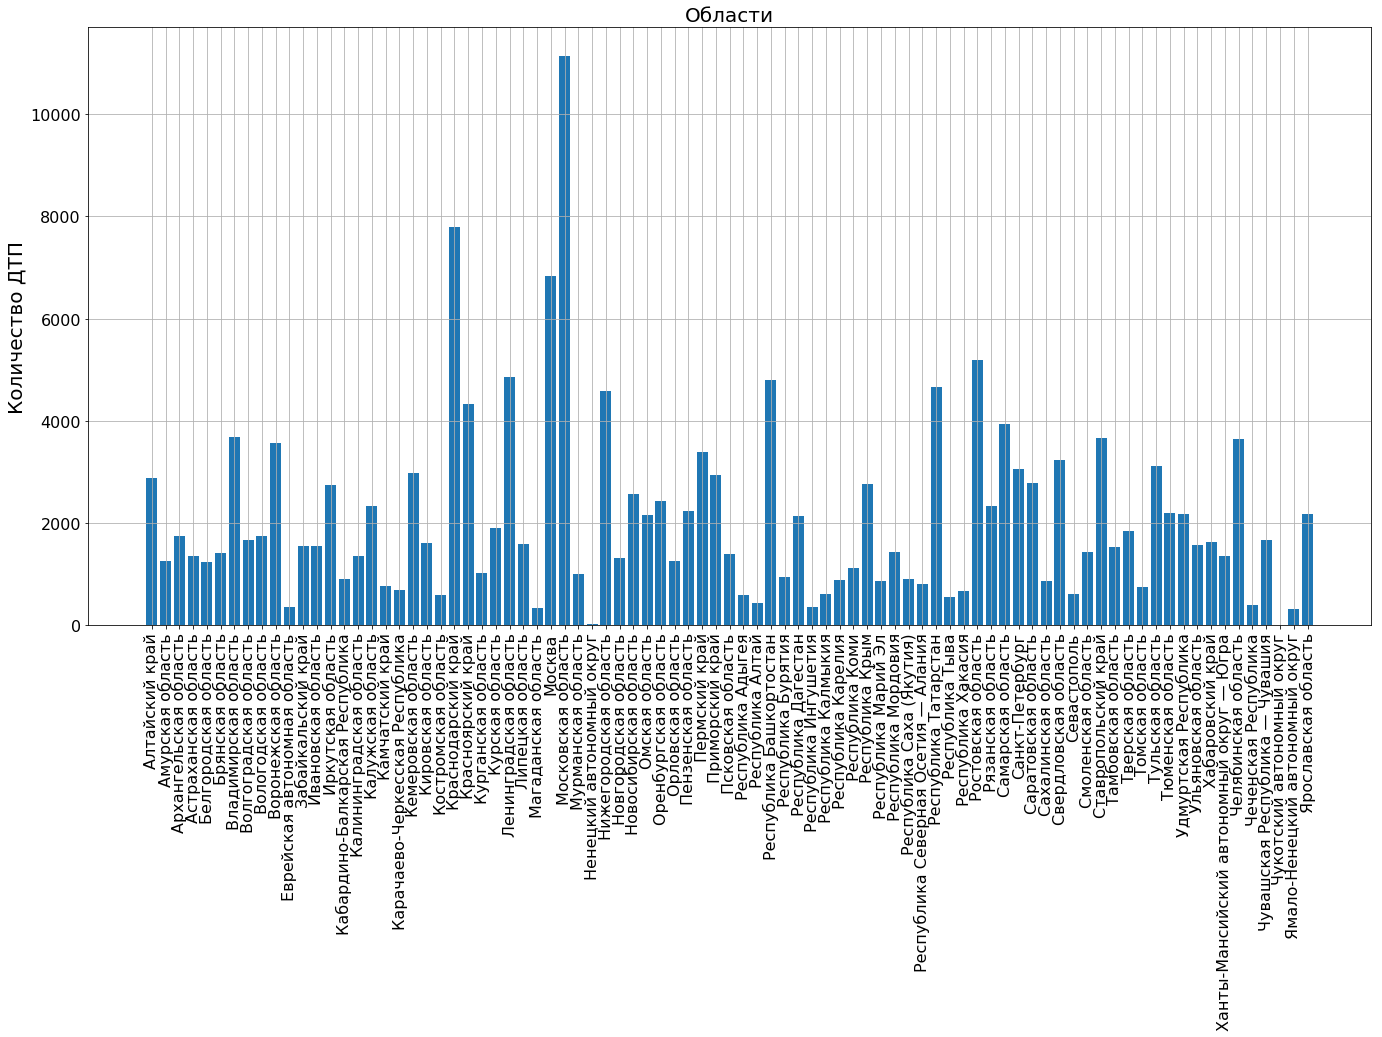

In [4]:
# P. 4
g = df.groupby('reg_name')
#print(g.groups.keys())
p={i:(g.get_group(i)).shape[0] for i in g.groups.keys()}
#print(p)
#g.get_group('Саратовская область')
x=list(p.keys())
y=list(p.values())
x_1=list(range(0,len(x)))
#plt.xticks(rotation=45)
plt.figure(figsize=(23,11))
plt.bar(x,y)
#plt.bar(figsize=(13, 6))
plt.xticks(x_1,x,rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Количество ДТП',fontsize=20)
plt.title('Области',fontsize=20)
plt.grid(True)
plt.show()


In [5]:
# P. 5
df= df.sort_values(by='crash_date',ascending=False)
g_year = df.groupby('crash_date')
p={i:int(str(i)[:4]) for i in g_year.groups.keys()}
df_year=df['crash_date'].replace(p)
#df_s.value_counts() 
print("Количество ДТП в каждый год: ","\n"+str(df_year.value_counts()))


Количество ДТП в каждый год:  
2016    100391
2017     46233
2018     32425
Name: crash_date, dtype: int64


In [6]:
# P. 6
g = df.groupby('crash_date')
#gg=g[20180102]
mes={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
s={(int(str(i)[:6])):int(str(i)[4:6]) for i in g.groups.keys()} #словарь гггг.мм:мм
ss={s[i]:(list(s.values())).count((s[i])) for i in s}# словарь мм:(сумма месяцев за все года в таблице)
p={i:int(str(i)[4:6]) for i in g.groups.keys()}# словарь гггг.мм.дд:мм (для замены )
df_s=df['crash_date'].replace(p)
df_ss=list(df_s)
df_1={s[i]:df_ss.count(s[i]) for i in s} # словарь мм:(количество присшествий в этот месяц за все года)
stat={mes[i]:(df_1[i]//ss[i]) for i in ss}
#gg=g[20180102]
#g.head()
print( "Среднее количество ДТП в месяц по 3м годам: ","\n",stat)
for key, value in stat.items(): 
    if value == max(list(stat.values())):
        print('Самый опасный месяц: ',key)
    elif value ==min(list(stat.values())):
        print('Самый безопасный месяц: ',key)

#print(stat)

Среднее количество ДТП в месяц по 3м годам:  
 {'February': 3518, 'March': 3337, 'April': 2833, 'May': 5658, 'June': 5984, 'July': 5775, 'August': 7987, 'September': 7918, 'October': 9229, 'November': 7507, 'December': 4695, 'January': 3576}
Самый безопасный месяц:  April
Самый опасный месяц:  October


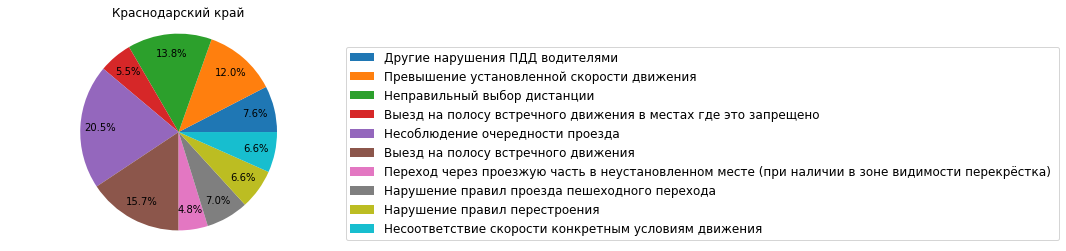

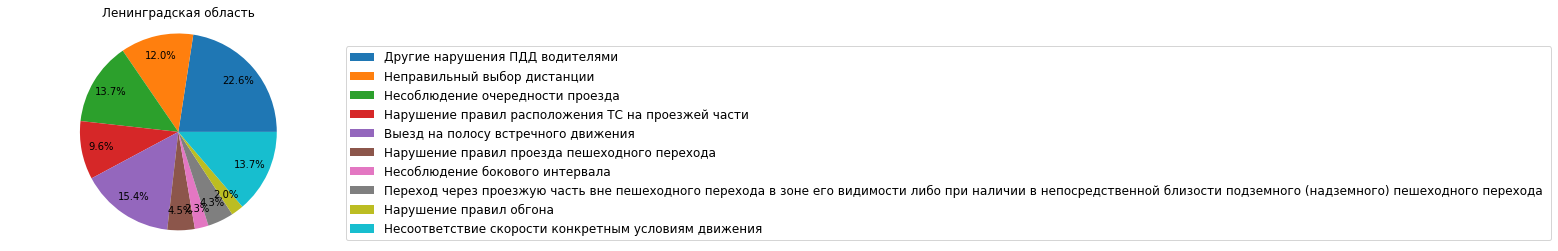

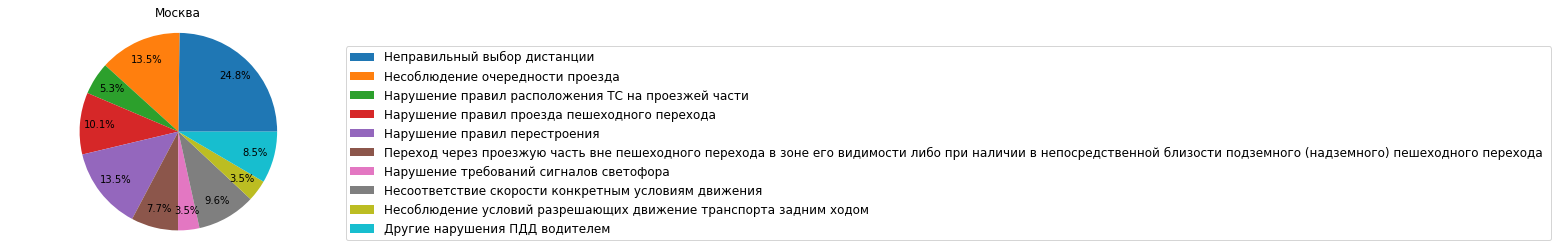

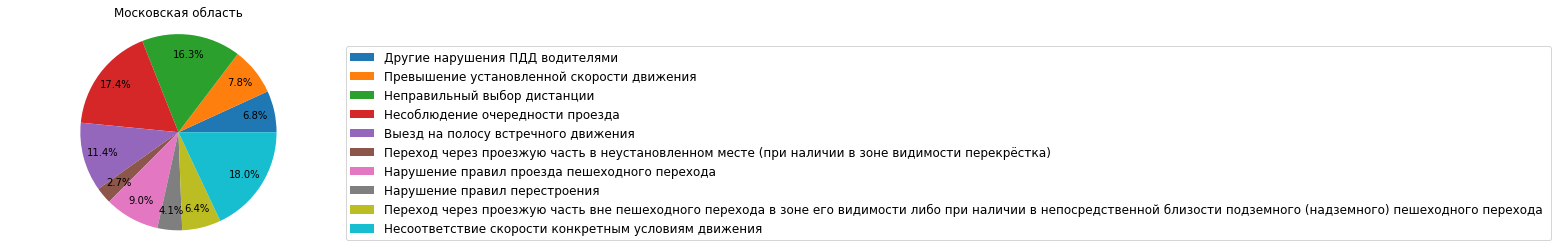

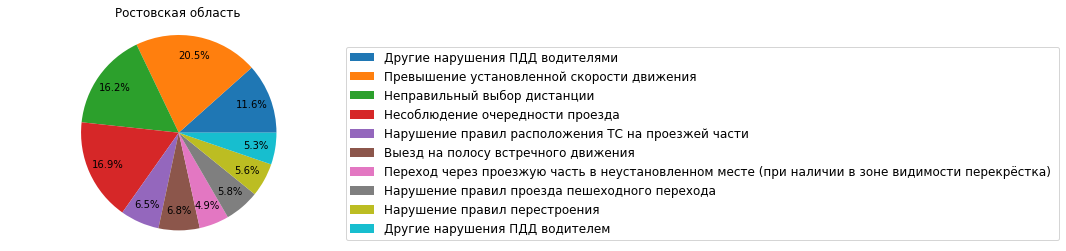

In [7]:
# P. 7 Теперь посмотрите на причины дтп: возьмите топ 5 самых опасных областей. И для каждой найдите топ 10 самых 
#распространенных пиричин ДТП. Нарисуйте piechart'ы причин для каждой области. (Пожалуйста, напишите в заголовке пайчарта
#название области). Посмотрите, отличаются ли причины для каждой области?
import numpy as np
import matplotlib.pyplot as plt
g_name = df.groupby('reg_name')
p={i:(g_name.get_group(i)).shape[0] for i in g_name.groups.keys()}
sort_val=list(p.values())
sort_val.sort()
e=sort_val[-5:]
top_ob=[]
#top_ob=[key for key, value in p.items() if value in e and len(top_ob)<5]
for key, value in p.items():
    if value in e and len(top_ob)<5:
        top_ob.append(key)
        #np.append(top_ob,key)
res_1={}
res_2={}
alf={chr(i) for i in range(1040,1072)}
for i in top_ob:
    #print(i)
    ob=g_name.get_group(i)
#m=mos_ob.groupby('crash_reason')
#m.groups.keys()
    s=(' '.join(ob['crash_reason']).replace(',',''))
    a=0
    c=0
#gg=set()
    gg=[]
    for k in range(len(s)-3):
        a+=1
        if s[k]==' ' and s[k+1] in alf and not (s[k+2] in alf):
        #gg.add(s[c:a])
            gg.append(s[c:a])
            c=a
    for j in gg:
        res_2[j]=(s).count(j)
    res_2_a=res_2.copy()
    
    top_5_v=list(res_2.values())
    top_5_v.sort()
    e_v=top_5_v[-10:]
    top_5={}
    #print(top_5_v)
    for key, value in res_2_a.items():
        if value in e_v and len(top_5)<10:
            top_5[key]=value
    plt.pie(list(top_5.values()), autopct='%1.1f%%',pctdistance=0.8,radius=200)
    plt.legend(loc=(1,0),labels=list(top_5.keys()),fontsize=12)
    plt.axis('equal')
    plt.title(i,fontsize=12)
    plt.show()


In [8]:
# P. 8  Найдите самое "опасное" время. Для этого вам придется написать функцию, которая будет переводить строку 
#       формата "HH:MM:SS" в число в секундах и обратно. Реализуйте эти действия в виде одной функции, на вход которой 
#       будет подаваться либо число, либо строка, и которая будет вовзаращать строку или число соответственно. 
#       (понадобится функция type). Если не получится реализовать в виде одной функции, напишите 2 отдельные.

def time(x):
    if type(x)==str:
        s=x.split(':')
        sec=(int(s[0])*60+int(s[1]))*60+int(s[2])
        return (sec)
    elif type(x)==int:
        h=x//3600
        m=(x%3600)//60
        s=((x%3600)%60)
        tim=[str(h),str(m),str(s)]
        return ':'.join(tim)
    else:
        return 'Введите либо строку, либо число!'


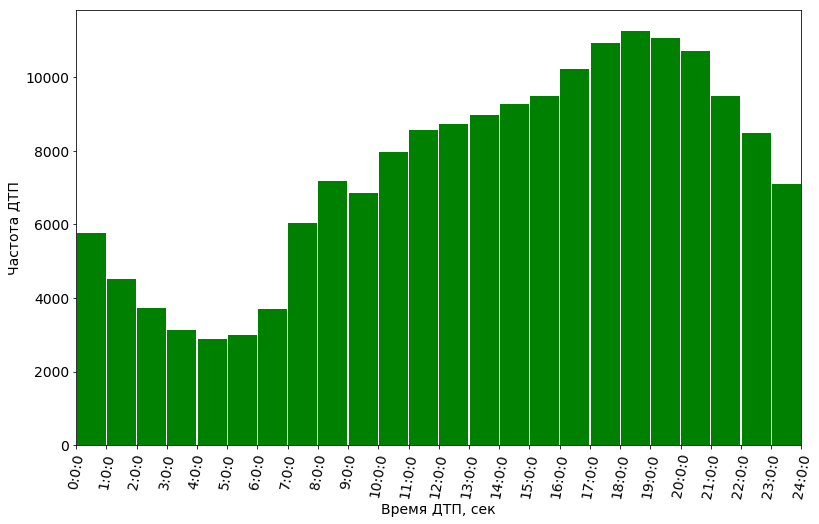

In [14]:
# P. 9 Вариант №2
ff = df.groupby('crash_time')
f=[time(df['crash_time'].iloc[i]) for i in range(df['crash_time'].shape[0])]
bins=np.array(range(25))*3600
x_axis=[time(i*3600) for i in range(25)]

plt.figure(figsize=(13,8))
plt.hist(f,bins=bins,histtype='bar',color='green',rwidth=0.96,align='mid')
#,rotation=70,fontsize=18)
plt.xlabel('Время ДТП, сек',fontsize=14)
plt.ylabel('Частота ДТП',fontsize=14)
#plt.grid(True)
plt.xlim(0,max(bins))
plt.xticks(bins,x_axis,fontsize=14,rotation=80)
plt.yticks(fontsize=14)
plt.show()

#grid(True)
#print(ff)


In [12]:
# P. 10
TT = df.groupby('crash_time')
T={i:(TT.get_group(i)).shape[0] for i in TT.groups.keys()}
T_1={time(i):T[i] for i in T}
T_k=list(T_1.keys())
T_k.sort()
i=0
a=0
b=0
sum_time={}
while a!=24:
    b=0
    #print(i)
    while T_k[i]>=3600*a and T_k[i]<3600*(a+1):
        b=b+T_1[T_k[i]]
        if i<len(T_k)-1:
            i+=1
        else:
            break
    #print(i)
    sum_time[a]=b
    a+=1
for key, value in sum_time.items():
    if value==max(list(sum_time.values())):
        print('Самое опасное время:', time(key*3600),'-',time((key+1)*3600))
        break

Самое опасное время: 18:0:0 - 19:0:0


In [13]:
# P. 11 
#00:00-03:00 - ночь;
#04:00-11:00 - утро;
#12:00-16:00 - день;
#17:00-23:00 - вечер.
print("Cтатистика приведена в среднем за 3 года:\n")
# Cогласно пункту 5
crash_year={i for i in list(df_year)}
danger_year={i:list(df_year).count(i) for i in crash_year}
danger_year
for key,value in danger_year.items():
    if value==max(list(danger_year.values())):
        print('Самый опасный год:', key)
        break
# Согласно пункту 6
for key, value in stat.items(): 
    if value == max(list(stat.values())):
        print('Самый опасный месяц: ',key)
        break
# Согласно пункту 10 
for key, value in sum_time.items():
    if value==max(list(sum_time.values())):
        time_24=key*3600
        break
if time_24>=0 and time_24<4*3600:
    print('Самое опасное время суток: Ночь')
elif time_24>=4*3600 and time_24<11*3600:
    print('Самое опасное время суток: Утро')
elif time_24>=11*3600 and time_24<16*3600:
    print('Самое опасное время суток: День')
elif time_24>=16*3600 and time_24<22*3600:
    print('Самое опасное время суток: Вечер')
else:
    print('Самое опасное время суток: Ночь')
#
g_crash=list(df['crash_reason'])
s_c=(' '.join(g_crash).replace(',',''))
a=0
c=0
r_crash={}
gg_crash=set()
alf={chr(i) for i in range(1040,1072)}
for k in range(len(s_c)-3):
    #print(a)
    a+=1
    if s_c[k]==' ' and (s_c[k+1] in alf) and not (s_c[k+2] in alf):
        #gg.add(s[c:a])
        gg_crash.add(s_c[c:a])
        c=a
        #print(c)
for j in gg_crash:
    r_crash[j]=(s_c).count(j)
        
for key,value in r_crash.items():
    if value==max(list(r_crash.values())):
        print('Самая рапространенная причина ДТП: '+key)
        break

Cтатистика приведена в среднем за 3 года:

Самый опасный год: 2016
Самый опасный месяц:  October
Самое опасное время суток: Вечер
Самая рапространенная причина ДТП: Несоблюдение очередности проезда 


### Обратная связь
Пожалуйста, пройдите [анкету](https://goo.gl/forms/IeIO2lVd9iY7GN4v2) и оставьте свои впечатления от домашней работы / лекции. Мы очень хотим стать для вас лучше)))